In [1]:
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')
import cv2
from PIL import Image
import numpy as np
import pandas as pd
from PIL import Image
import sys
import random
!pip install -q "tqdm>=4.36.1"
import tqdm

In [13]:
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
import seaborn as sns

In [7]:

input_shape = (224,224,3)
epsilon = 0.001

model = Sequential()

# Initial batch normalization layer
model.add(BatchNormalization(input_shape=input_shape, epsilon=epsilon))

# First Conv Block
model.add(Conv2D(filters=16, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

# Second Conv Block
model.add(Conv2D(filters=32, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Third Conv Block
model.add(Conv2D(filters=64, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Fourth Conv Block
model.add(Conv2D(filters=128, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Fifth Conv Block
model.add(Conv2D(filters=256, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Sixth Conv Block
model.add(Conv2D(filters=512, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Seventh Conv Block
model.add(Conv2D(filters=1024, kernel_size=3, padding='same'))
model.add(BatchNormalization(epsilon=epsilon))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.1))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_10          │ (None, 224, 224, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 14, 14, 256)    │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 6,301,549 (24.04 MB)

 Trainable params: 6,297,479 (24.02 MB)

 Non-trainable params: 4,070 (15.90 KB)

In [8]:
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

In [9]:
# datapath = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 64
train_flow = image_gen.flow_from_directory(
    '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
valid_flow = image_gen.flow_from_directory(
    '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/valid', target_size=(224, 224), batch_size=batch_size, class_mode='binary'
)
test_flow = image_gen.flow_from_directory(
    '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test', target_size=(224, 224), batch_size=1, shuffle=False, class_mode='binary'
)

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [10]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=10000,
    decay_rate=0.9)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [11]:
from keras.optimizers import Adam
model.compile(loss='binary_crossentropy',optimizer= opt, metrics=['accuracy'])

In [16]:
checkpoint_filepath = '/kaggle/working/checkpoint.model.keras'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
callbacks_list = [model_checkpoint_callback]

In [17]:
train_steps = 80000//64
valid_steps = 5000//64

history = model.fit(
    train_flow,
    epochs =4,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/4
   1/1250 ━━━━━━━━━━━━━━━━━━━━ 12:08:56 35s/step - accuracy: 0.4688 - loss: 0.9816

I0000 00:00:1719455506.755893     113 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 712s 542ms/step - accuracy: 0.5613 - loss: 0.9029 - val_accuracy: 0.7266 - val_loss: 0.5513
Epoch 2/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 101s 81ms/step - accuracy: 0.7629 - loss: 0.4915 - val_accuracy: 0.7376 - val_loss: 0.5249
Epoch 3/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 312s 248ms/step - accuracy: 0.8114 - loss: 0.4119 - val_accuracy: 0.8706 - val_loss: 0.3142
Epoch 4/4
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 61ms/step - accuracy: 0.8927 - loss: 0.2591 - val_accuracy: 0.8992 - val_loss: 0.2425


In [18]:
history = model.fit(
    train_flow,
    epochs =2,
    callbacks= callbacks_list,
    steps_per_epoch = train_steps,
    validation_data = valid_flow,
    validation_steps = valid_steps
)

Epoch 1/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 252s 201ms/step - accuracy: 0.9141 - loss: 0.2110 - val_accuracy: 0.9229 - val_loss: 0.2027
Epoch 2/2
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 59ms/step - accuracy: 0.9411 - loss: 0.1522 - val_accuracy: 0.9417 - val_loss: 0.1504


In [20]:
model.save("final-model-1.h5")

In [19]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

20000/20000 ━━━━━━━━━━━━━━━━━━━━ 148s 7ms/step


Accuracy Score : 0.94565
Report : 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     10000
           1       0.94      0.96      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



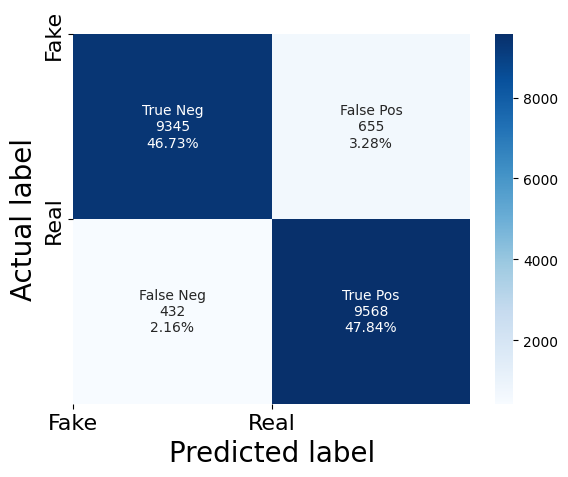

In [21]:
results = confusion_matrix(y_test, y_pred > 0.5) 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in results.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in results.flatten()/np.sum(results)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(results, annot=labels, fmt='', cmap = 'Blues')
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
plt.xticks(np.arange(2), ['Fake', 'Real'], size = 16)
plt.yticks(np.arange(2), ['Fake', 'Real'], size = 16)
print('Accuracy Score :',accuracy_score(y_test, y_pred > 0.5))
print('Report : ')
print(classification_report(y_test, y_pred > 0.5))

In [22]:
print("ROC-AUC Score:", metrics.roc_auc_score(y_test, y_pred))
print("AP Score:", metrics.average_precision_score(y_test, y_pred))

ROC-AUC Score: 0.98866739
AP Score: 0.9885433667489156


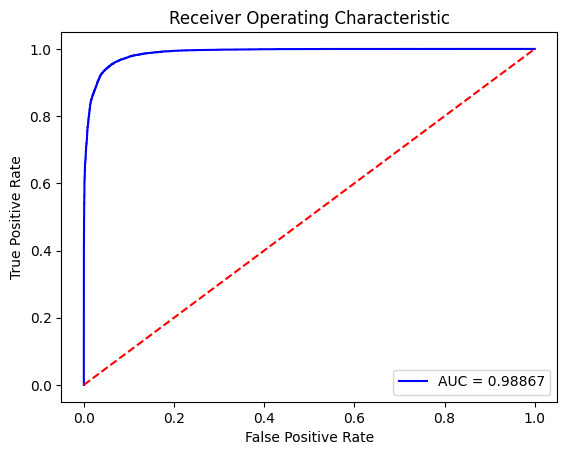

In [23]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step


Text(0.5, 1.0, 'Predicted by the model as FAKE, actually is FAKE')

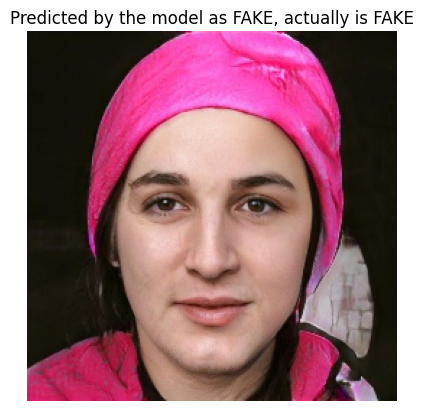

In [24]:
i = np.random.randint(20000)
datapath = '/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/'
datasetpath = test_flow.filenames[i]
imgpath = datapath+'test/'+datasetpath
plt.imshow(mpimg.imread(imgpath))
plt.axis('off')

if test_flow.classes[i] == 0:
    actual = "FAKE"
else:
    actual = "REAL"  
if model.predict(test_flow[i][0])[0][0]<0.5:
    prediction = "FAKE"
else:
    prediction = "REAL"

plt.title(f"Predicted by the model as {prediction}, actually is {actual}")

In [25]:
def predict_img_class():
    k = np.random.randint(20000)
    gridx = 4
    gridy = 4
    fig, ax = plt.subplots(gridx,gridy, figsize=(14,14))
    for j in range(gridx):
        for i in range(gridy):
            if test_flow.classes[k] == 0:
                actual = "FAKE"
            else:
                actual = "REAL"  
            if model.predict(test_flow[k][0])[0][0]<0.5:
                prediction = "FAKE"
            else:
                prediction = "REAL"
            datasetpath = test_flow.filenames[k]
            imgpath = datapath+'test/'+datasetpath
            img = load_img(imgpath)          
            ax[j,i].imshow(img)
            ax[j,i].set_title(f"Predicted: {prediction}, Actual: {actual}",size = 12)
            ax[j,i].axis('off')
            k = np.random.randint(20000)
    fig.suptitle('Testing the prediction on Test images', size = 20)
    return plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.10/site-packages/matplotlib/pyplot.py'>

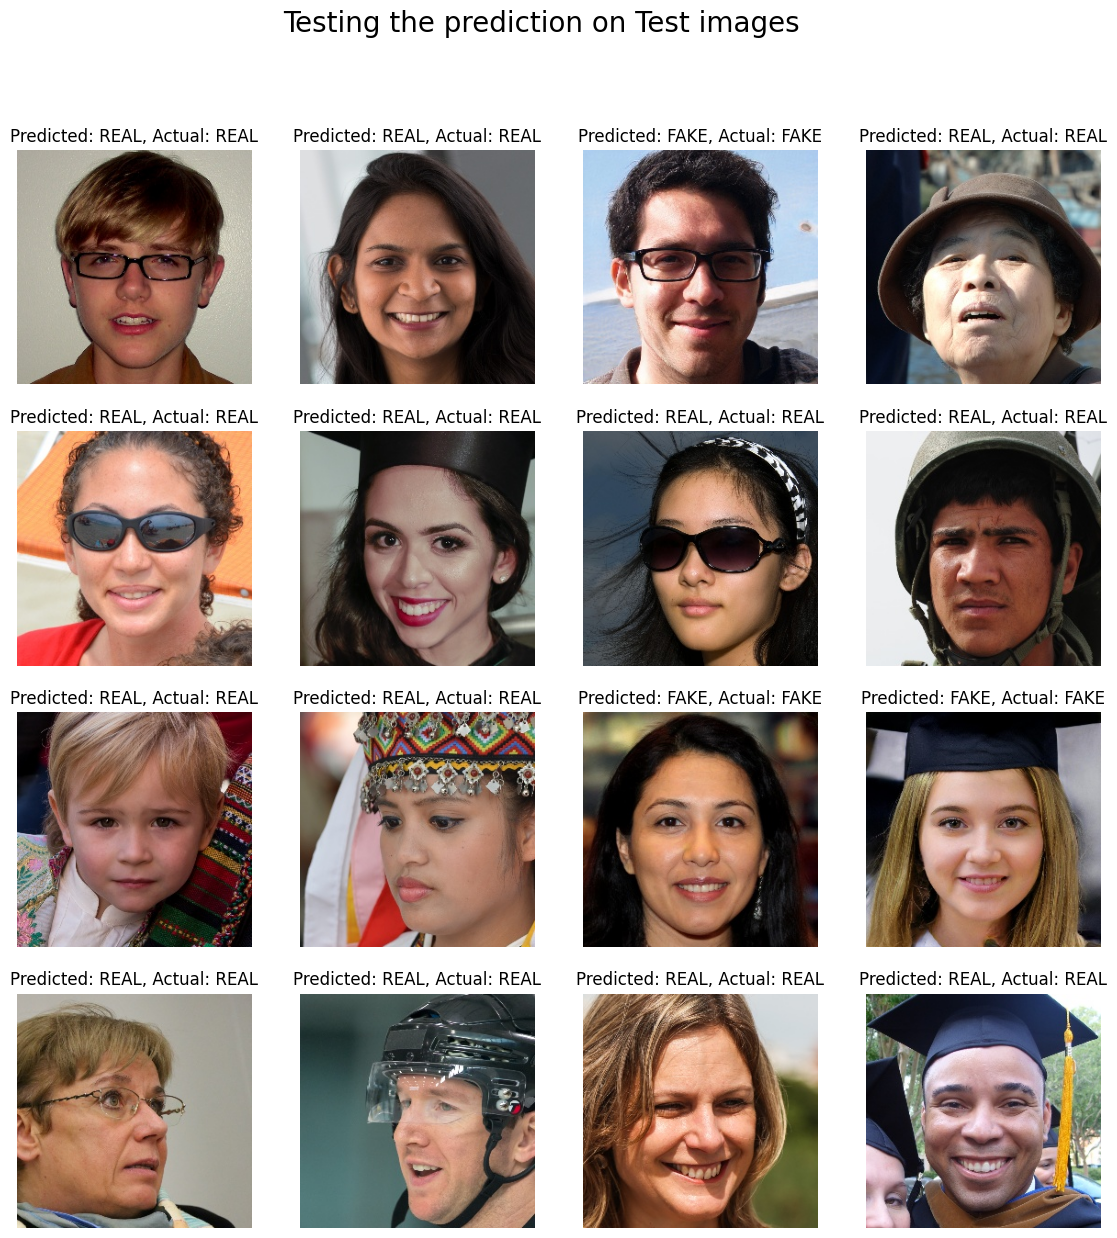

In [26]:
predict_img_class()